In [1]:
import pandas as pd
n_movies = pd.read_csv('n_movies.csv')
#n_movies.head()

In [2]:
n_movies['genre'] = n_movies['genre'].str.split(', ')

In [3]:
wrangled_n_movies = n_movies.loc[n_movies["rating"].notnull()]
#wrangled_n_movies.head(10)

In [4]:
netflix_titles = pd.read_csv("netflix_titles.csv")
netflix_titles['certificate'] = netflix_titles['rating']
netflix_titles.drop('rating', axis=1, inplace=True)
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,certificate
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",PG-13
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV-MA
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV-MA
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV-MA
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV-MA


In [5]:
merged_data = netflix_titles.merge(wrangled_n_movies, how='inner', on='title') #inner join on title
#print(merged_data)
merged_data.rename(columns={'duration_x':'seasons / movie length', 'duration_y': 'episode / movie length'}, inplace=True)

#get rid of trailing 'min' in episode / movie length column:
merged_data['episode / movie length'] = merged_data['episode / movie length'].replace(r'min$' , regex = True, value='')

#turn values in episode / movie length column to float so we can perform computations on them:
merged_data['episode / movie length'] = merged_data['episode / movie length'].astype(float)

#get rid of trailing 'min' in seasons / movie length column:
merged_data['seasons / movie length'] = merged_data['seasons / movie length'].replace(r'min$' , regex = True, value='')

merged_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,seasons / movie length,listed_in,description_x,certificate_x,year,certificate_y,episode / movie length,genre,rating,description_y,stars,votes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,90,Documentaries,"As her father nears the end of his life, filmm...",PG-13,(2020),PG-13,89.0,"[Documentary, Biography, Drama]",7.4,A daughter helps her father prepare for the en...,"['Kirsten Johnson', '| ', ' Stars:', 'Micha...","6,636"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV-MA,(2020– ),TV-MA,53.0,"[Drama, Mystery]",6.6,A local teen uncovers her family's secret past...,"['Ama Qamata, ', 'Khosi Ngema, ', 'Gail Mabala...","3,180"
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV-MA,(2020– ),TV-MA,43.0,"[Drama, Mystery]",7.0,Puleng bears her parents' complex sadness as e...,"['Nosipho Dumisa', '| ', ' Stars:', 'Ama Qa...",120
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV-MA,(2021– ),TV-MA,44.0,"[Action, Crime, Drama]",7.0,"Mehdi, a qualified robber, and Liana, an appre...","['Tracy Gotoas, ', 'Sofia Lesaffre, ', 'Salim ...","2,640"
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV-MA,(2021– ),TV-MA,NaN,"[Documentary, Reality-TV]",6.7,"Feuds, flirtations and toilet talk go down amo...",[],229


In [6]:
#group by title to get average rating for title - this is needed because individual episodes are listed, 
#so we want the average rating for a show based on individual episode ratings: 
grouped_rating= merged_data.groupby('title')['rating'].mean().to_frame().reset_index()

#renaming this column for clarity:
grouped_rating.rename(columns={'rating':'average rating'}, inplace=True)

#group by title to get average length of the episode / movie - this is needed for the same reason listed above
grouped_episode_duration = merged_data.groupby('title')['episode / movie length'].mean().to_frame().reset_index()

grouped_episode_duration.rename(columns={'episode / movie length':'average episode / movie length'}, inplace=True)

In [31]:
#making a copy of the merged data set to preserve the original one:
merged_data_copy = merged_data.copy()

#merge rating group by with merged data set to get a column with average rating
merge_average_rating = pd.merge(merged_data_copy, grouped_rating)

#merge the new df with the average rating column with average episode duration
merge_with_two_avg_col = pd.merge(merge_average_rating, grouped_episode_duration)

#same as the original merged_data, but now has two columns for average rating and average episode / movie length
merge_with_two_avg_col.head()


,show_id,type,title,director,cast,country,date_added,release_year,seasons / movie length,listed_in,...,year,certificate_y,episode / movie length,genre,rating,description_y,stars,votes,average rating,average episode / movie length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,90,Documentaries,...,(2020),PG-13,89.0,"[Documentary, Biography, Drama]",7.4,A daughter helps her father prepare for the en...,"['Kirsten Johnson', '| ', ' Stars:', 'Micha...","6,636",7.4,89.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,(2020– ),TV-MA,53.0,"[Drama, Mystery]",6.6,A local teen uncovers her family's secret past...,"['Ama Qamata, ', 'Khosi Ngema, ', 'Gail Mabala...","3,180",6.8,48.0
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,(2020– ),TV-MA,43.0,"[Drama, Mystery]",7.0,Puleng bears her parents' complex sadness as e...,"['Nosipho Dumisa', '| ', ' Stars:', 'Ama Qa...",120,6.8,48.0
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,(2021– ),TV-MA,44.0,"[Action, Crime, Drama]",7.0,"Mehdi, a qualified robber, and Liana, an appre...","['Tracy Gotoas, ', 'Sofia Lesaffre, ', 'Salim ...","2,640",7.0,44.0
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV",...,(2021– ),TV-MA,NaN,"[Documentary, Reality-TV]",6.7,"Feuds, flirtations and toilet talk go down amo...",[],229,6.7,NaN


In [44]:
#make a copy of the df above with the two average columns to have final cleaned data set
cleaned_data_set = merge_with_two_avg_col.copy()

cleaned_tv_shows = cleaned_data_set[cleaned_data_set["type"] == 'TV Show']

#just movies in clean set
cleaned_movies = cleaned_data_set[cleaned_data_set["type"] == 'Movie']



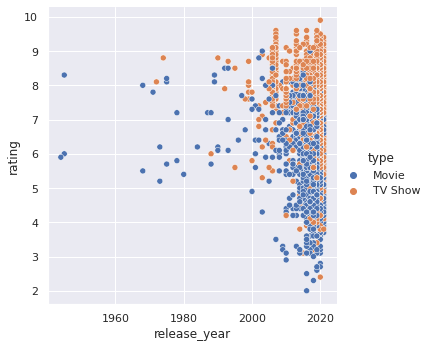

In [9]:
import seaborn as sns
sns.set_theme()
sns.relplot(x='release_year', y='rating', hue="type", data=cleaned_data_set);

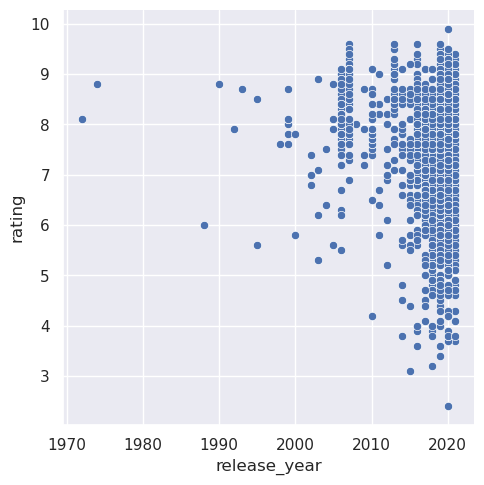

In [10]:
sns.relplot(x='release_year', y='rating', data=cleaned_tv_shows, color='b')

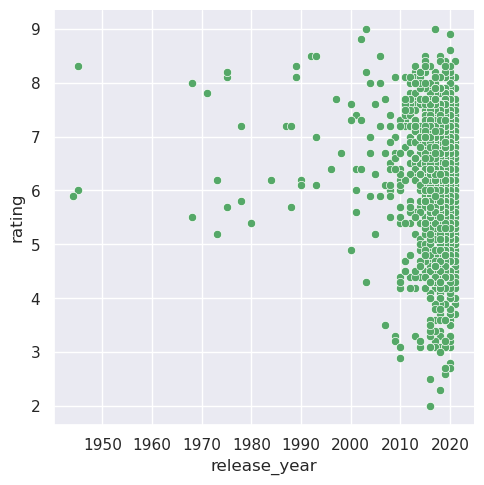

In [39]:
sns.relplot(x='release_year', y='rating', data=cleaned_movies, color='g')

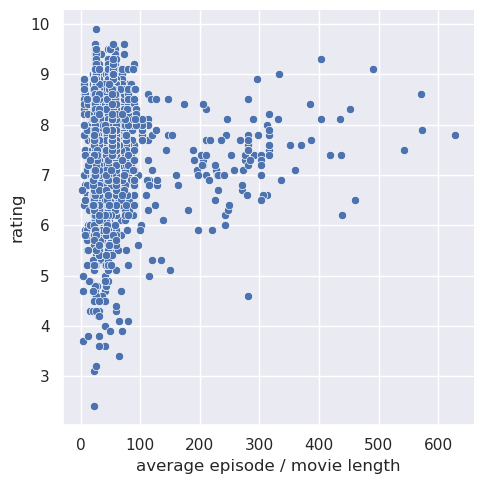

In [45]:
sns.relplot(x='average episode / movie length', y='rating', data=cleaned_tv_shows, color='b')

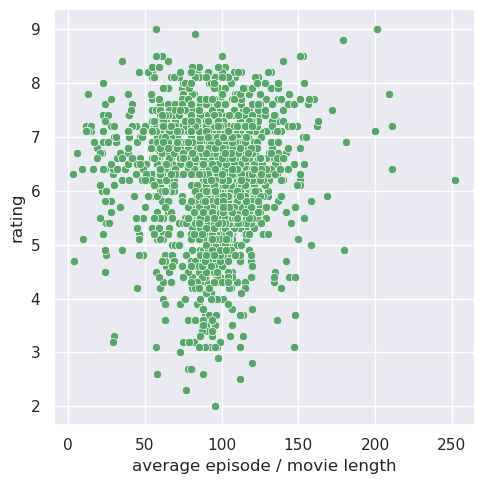

In [46]:
sns.relplot(x='average episode / movie length', y='rating', data=cleaned_movies, color='g')

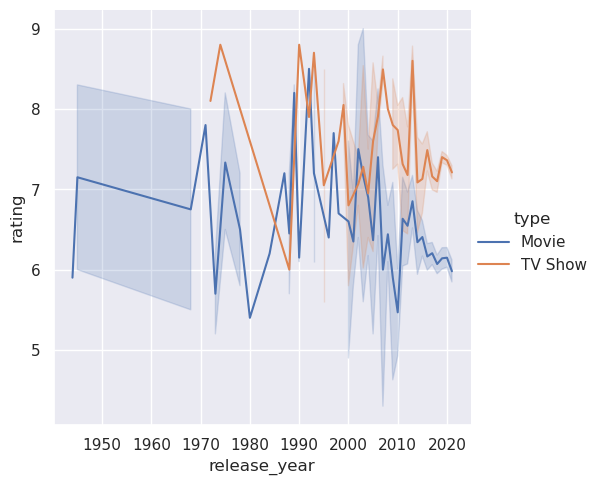

In [12]:
sns.relplot(x="release_year", y="rating", data=cleaned_data_set, hue='type', kind="line")

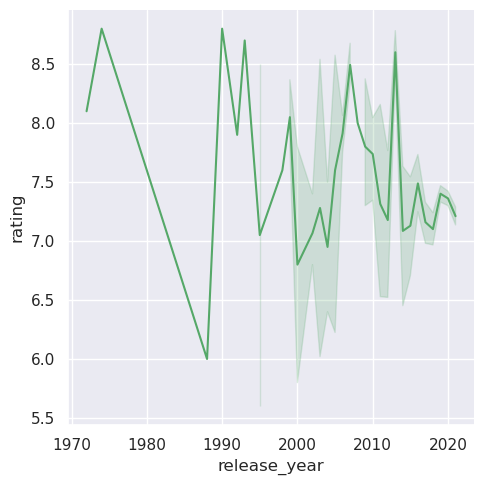

In [13]:
sns.relplot(x="release_year", y="rating", data=cleaned_tv_shows, kind="line", color='g')

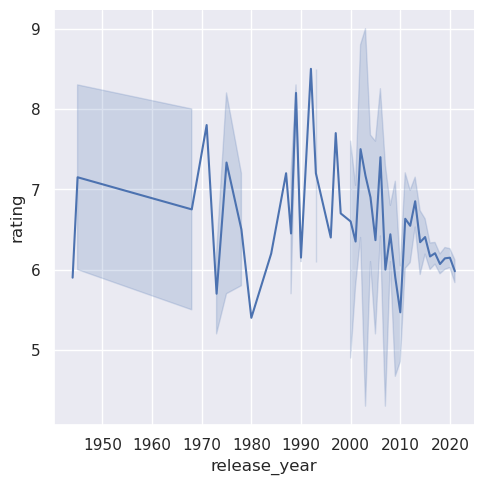

In [14]:
sns.relplot(x="release_year", y="rating", data=cleaned_movies, kind="line", color='b')

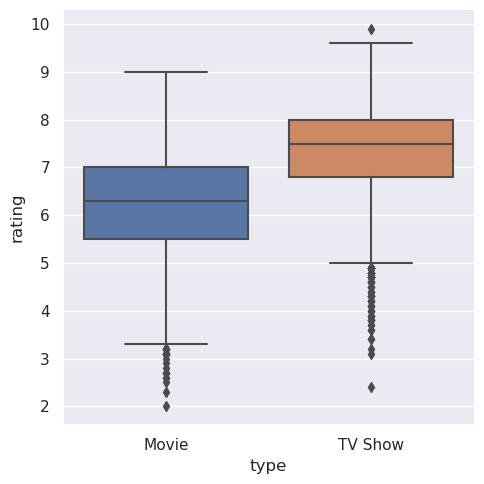

In [15]:
sns.catplot(data=cleaned_data_set, x="type", y="rating", kind="box")

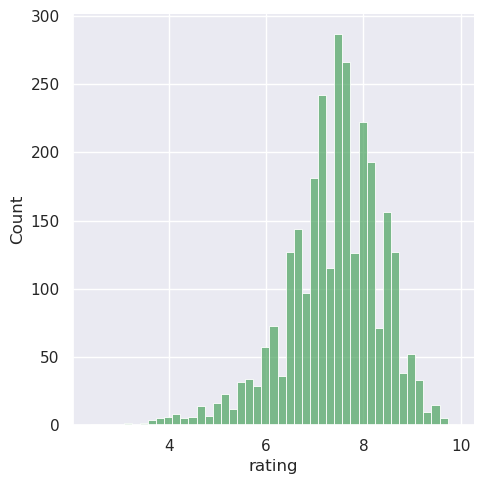

In [16]:
sns.displot(data=cleaned_tv_shows, x="rating", color='g')

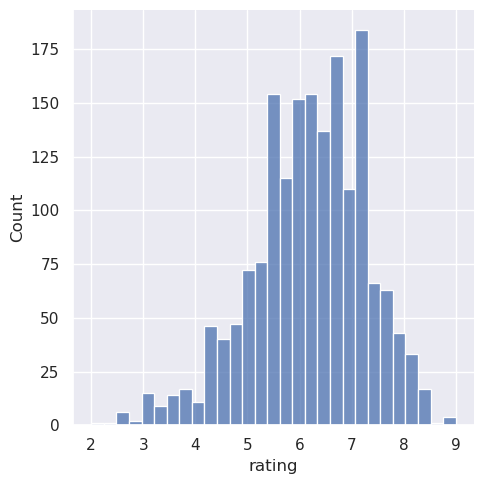

In [17]:
sns.displot(data=cleaned_movies, x="rating")

In [18]:

#rating_x is maturity rating, which is already listed as certificate. drop rating_x bc of redundancy?
    #combined them certificate
#rating_y is imdb rating
#before merge, if we wanted to preserve those titles listed in netflix_titles without an indication of tv or movie, 
#we could use a regex from certificate
    #BUT, the merged data just based on title still has 4600+ rows, so not necessary

#1) Group by title and then take average imdb rating to account for different episodes listed
    #could also do the same to get the average episode length
#2) duration_x either gives movie length or it gives number of seasons (for tv show) 
    #duration_y gives movie length or length of a single episode
    #if we wanted to calculate some figure that depends on content length and imdb rating, we could do a visualization for tv shows
    #either dependent on number of seasons or average episode length in the group_by indicated in #1)
    